Steps to follow in any data processing:

1.   Know the problem
2.   Obtain the training and test data
3.   Preprocessing and data cleaning
4.   Exploratory analysis
5.   Develop a model
6.   Visualize and report the solution and results.

# Data collection

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#dataframes array
combine = [train, test] 

In [3]:
pd.set_option('display.expand_frame_repr', False)

In [4]:
combine

[     PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
 0              1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
 1              2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
 2              3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
 3              4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
 4              5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S
 ..           ...       ...     ...                       

# Exploratory analysis

Features description

In [5]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
print(test.columns.values)

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [7]:
print(train.info())
print('-'*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

**Categorical variable**: defines a category --> Male,Female,Undefined --> can be 0 - 1 ... or with words

**Ordinal variable**: defines a sorted category --> dirty, medium, clean

**Numerical variable** --> discrete or continuous

  - **Discrete numerical variable**: counted items --> number of children
  - **Continuous numerical variable**: measurable characteristics --> weight

------------------------------------------------------------------------

In [8]:
print(train['Survived'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


**Categorical features:** Survived, Sex, Embarked

**Ordinal features:** Pclass

**Discrete numerical features:** PassengerID, SibSp, Parch

**Continuous numerical features:** Age, Fare

**Mixed features:** Ticket, Cabin

**Error-prone features:** Name

**Attributes with null values require correction**.

In the training data, *Age Cabin Embarked* has null values.

In the test data, *Age Cabin* has null values.

In [9]:
train.describe(include='all') 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Seward, Mr. Frederic Kimber",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb6f518250>]],
      dtype=object)

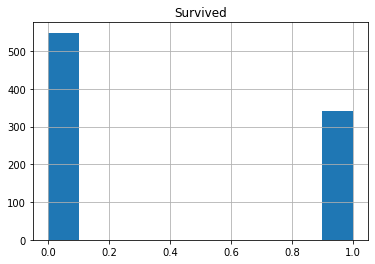

In [10]:
train.hist('Survived')

There is not too much imbalance between classes.

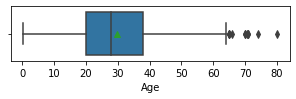

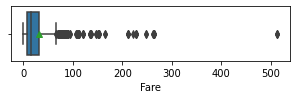

In [11]:
valores = ['Age','Fare']
for col in valores:
    fig,ax = plt.subplots(1,1,figsize=(5,1))    
    sns.boxplot(x=train[col],showmeans=True)
    plt.show()

**Correlation analysis between variables**.

We do it with features that do not have any null value and that are categorical (Sex), ordinal (Pclass) or discrete numerical (SibSp,Parch).

In [12]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
train[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**Data visualization analysis**

*Correlation between numerical variables and our Survived solution*

Histogram -> continuous numerical variables

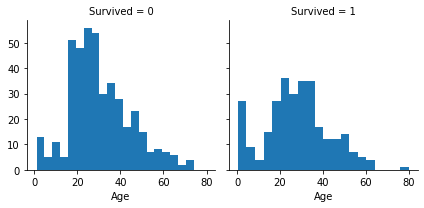

In [16]:
g = sns.FacetGrid(train, col='Survived')

g.map(plt.hist, 'Age', bins=20)

*Correlation with numerical and ordinal features*

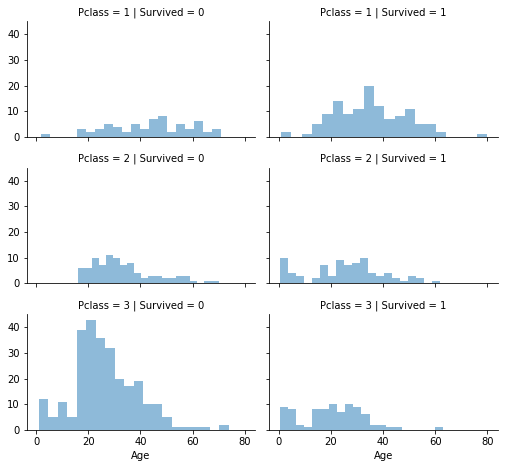

In [17]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

*Correlation of categorical variables*

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


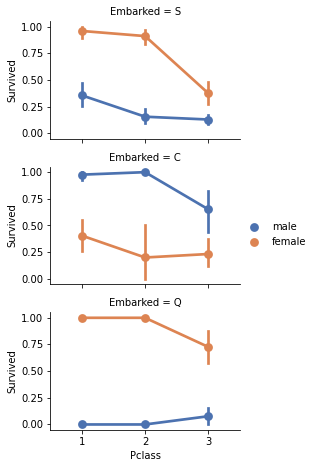

In [18]:
grid = sns.FacetGrid(train, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass','Survived','Sex', palette='deep')
grid.add_legend()

*Correlation between categorical and numerical variables*.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


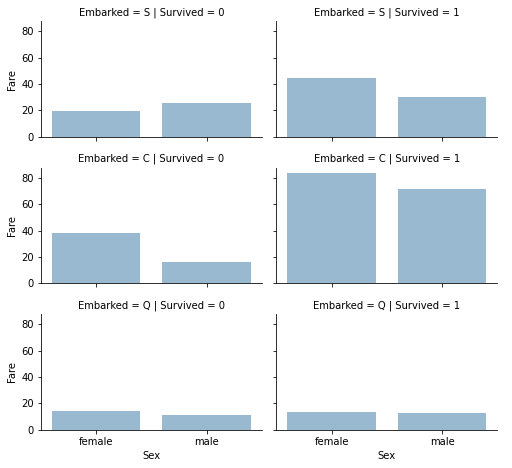

In [19]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=None)
grid.add_legend()

#**DATA PREPARING**

##*Dropping features*

In [20]:
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)

combine = [train,test]
print(combine[0].shape)
print(combine[1].shape)

(891, 10)
(418, 9)


##*Feature extracting*

In [21]:
for dataset in combine:
  dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [22]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [23]:
for dataset in combine:
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don',\
                                               'Dr', 'Major', 'Rev','Sir','Jonkheer','Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'],'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

In [24]:
train[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [25]:
titles = {"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}

for dataset in combine:
  dataset['Title']= dataset['Title'].map(titles)
  dataset['Title']= dataset['Title'].fillna(0)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [27]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop('Name', axis=1) #dejamos PassengerId en test por la submission del final
combine = [train,test]
print(train.shape,test.shape)

(891, 9) (418, 9)


In [28]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,1
1,893,3,female,47.0,1,0,7.0000,S,3
2,894,2,male,62.0,0,0,9.6875,Q,1
3,895,3,male,27.0,0,0,8.6625,S,1
4,896,3,female,22.0,1,1,12.2875,S,3


*Convert categorical feature*

Strings --> Numerical values 

In [29]:
for dataset in combine:
  dataset['Sex']= dataset['Sex'].map({'female':1, 'male':0}).astype(int)

In [30]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


*Completing a numerical continuous feature*

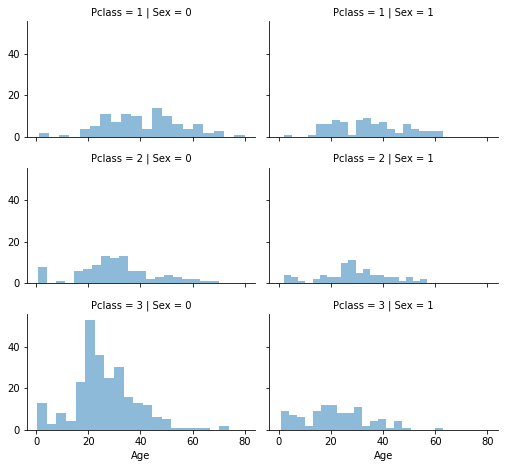

In [31]:
grid = sns.FacetGrid(train, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

In [32]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [33]:
for dataset in combine:
  for i in range(0,2):
    for j in range(0,3):
      #print(dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age']) #del nuevo dataset generado (sex 0, pclass 0 ...) cogemos solo Age
      guess_df = dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna() #cogemos los datos de las posibles combinaciones
      #print(guess_df) NOTA Aunque se haga dropna no se guardan los cambios al no sobreescribir
      age_guess = guess_df.median()
      guess_ages[i,j]=int (age_guess/0.5+0.5)*0.5
  
  for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
        
  dataset['Age'] = dataset['Age'].astype(int)


In [34]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [35]:
train['AgeBand'] = pd.cut(train['Age'],5)
train[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [36]:
for dataset in combine:
  dataset.loc[dataset['Age']<=16,'Age']=0
  dataset.loc[(dataset['Age']>16) & (dataset['Age']<=32),'Age']=1
  dataset.loc[(dataset['Age']>32) & (dataset['Age']<=48),'Age']=2
  dataset.loc[(dataset['Age']>48) & (dataset['Age']<=64),'Age']=3
  dataset.loc[dataset['Age']>64,'Age']=4

In [37]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [38]:
train = train.drop(['AgeBand'],axis=1)
combine = [train,test]

In [39]:
for dataset in combine:
  dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp'] + 1

train[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [40]:
for dataset in combine:
  dataset['IsAlone']=0
  dataset.loc[dataset['FamilySize']==1, 'IsAlone'] = 1 

train[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [41]:
train = train.drop(['Parch','SibSp','FamilySize'],axis=1)
test = test.drop(['Parch','SibSp','FamilySize'],axis=1)
combine=[train,test]

In [42]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [43]:
for dataset in combine:
  dataset['Age*Class'] = dataset.Age * dataset.Pclass



In [44]:
train.loc[:,['Age*Class','Age','Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [45]:
train[['Age*Class','Survived']].groupby('Age*Class',as_index=False).mean()

,Age*Class,Survived
0,0,0.550000
1,1,0.728814
2,2,0.520408
3,3,0.277487
4,4,0.415094
5,6,0.149425
6,8,0.000000
7,9,0.111111
8,12,0.000000


*Completing a categorical feature*

In [46]:
freq_port = train['Embarked'].dropna().mode()[0]
freq_port

'S'

In [47]:
for dataset in combine:
  dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train[['Embarked','Survived']].groupby('Embarked',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


*Converting categorical feature to numeric (ordinal)*

In [48]:
for dataset in combine:
  dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [49]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


*Completing and converting a numerical feature*

In [50]:
test['Fare'].fillna(test['Fare'].dropna().median(),inplace=True)

In [51]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [52]:
train['FareBand'] = pd.qcut(train['Fare'],4)
train[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand',ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [53]:
for dataset in combine:
  dataset.loc[dataset['Fare']<=7.91,'Fare']=0
  dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454),'Fare']=1
  dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31),'Fare']=2
  dataset.loc[(dataset['Fare']>31),'Fare']=3

  dataset['Fare'].astype(int)

In [54]:
train = train.drop(['FareBand'],axis=1)
combine=[train,test]

In [55]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0.0,0,1,0,3
1,1,1,1,2,3.0,1,3,0,2
2,1,3,1,1,1.0,0,2,1,3
3,1,1,1,2,3.0,0,3,0,2
4,0,3,0,2,1.0,0,1,1,6
5,0,3,0,1,1.0,2,1,1,3
6,0,1,0,3,3.0,0,1,1,3
7,0,3,0,0,2.0,0,4,0,0
8,1,3,1,1,1.0,0,3,0,3
9,1,2,1,0,2.0,1,3,0,0


In [56]:
test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0.0,2,1,1,6
1,893,3,1,2,0.0,0,3,0,6
2,894,2,0,3,1.0,2,1,1,6
3,895,3,0,1,1.0,0,1,1,3
4,896,3,1,1,1.0,0,3,0,3
5,897,3,0,0,1.0,0,1,1,0
6,898,3,1,1,0.0,2,2,1,3
7,899,2,0,1,2.0,0,1,0,2
8,900,3,1,1,0.0,1,3,1,3
9,901,3,0,1,2.0,0,1,0,3


# CLASSIFICATION

In [57]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [58]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.37

In [59]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201057
5,Title,0.406027
4,Embarked,0.276628
6,IsAlone,0.185986
7,Age*Class,-0.050260
3,Fare,-0.071665
2,Age,-0.469638
0,Pclass,-1.200309


In [60]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.83

In [61]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.73

In [62]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.88

In [63]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.35

In [64]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


79.46

In [65]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

77.1

In [66]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.64

In [67]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

In [68]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.64
8,Decision Tree,86.64
1,KNN,83.73
0,Support Vector Machines,82.83
2,Logistic Regression,81.37
7,Linear SVC,79.46
5,Perceptron,79.35
6,Stochastic Gradient Decent,77.10
4,Naive Bayes,76.88


In [69]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

In [70]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)

In [71]:
print(pd.read_csv('submission.csv'))

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
